In [1]:
# Importar pandas
import pandas as pd
import numpy as np
# Librerias para graficar
import matplotlib 
matplotlib.use('Qt5Agg')
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#pip install mysql-connector-python

In [3]:
# Conectar base de datos con MySQL
import mysql.connector
from mysql.connector import Error

Conexion = mysql.connector.connect(
    host='localhost',
    database='curso_python',
    user='root',
    password='Maracuya134',      
    port=3306)

In [4]:
Query = "SELECT * FROM curso_python.bmw_car_sales;"

In [5]:
db_bmw=pd.read_sql(Query, Conexion)

C:\Users\rrosm\AppData\Local\Temp\ipykernel_2308\2910469328.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  db_bmw=pd.read_sql(Query, Conexion)


In [6]:
# Analisis exploratorio de datos
db_bmw.head()   
db_bmw.info()
db_bmw.describe()  
db_bmw.isnull().sum()
db_bmw.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


0

In [7]:
#from ydata_profiling import ProfileReport 

In [8]:
# Reporte HTML del data frame
#profile = ProfileReport(db_bmw, title="Reporte de datos de ventas de BMW", explorative=True)
#profile.to_file("bmw_car_sales_report.html")

# Primera exploración de datos

In [9]:
db_bmw.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [10]:
# Estadisticas descriptivas basicas
db_bmw.describe()


,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [11]:
# Analisis de variables categoricas
## distibucion de los modelos vendidos
db_bmw['Model'].value_counts()

Model
7 Series    4666
i3          4618
i8          4606
3 Series    4595
5 Series    4592
X1          4570
X3          4497
X5          4487
M5          4478
X6          4478
M3          4413
Name: count, dtype: int64

In [12]:
# Graficar distribucion de modelos vendidos con grafico de barras
# plt.figure(figsize=(10,6))
# sns.countplot(data=db_bmw, x='Model', order=db_bmw['Model'].value_counts().index)
# plt.title('Distribución de Modelos Vendidos')
# plt.xlabel('Modelo')
# plt.ylabel('Cantidad Vendida')
# plt.xticks(rotation=45)
# plt.show()


In [13]:
# Analisis de distribucion por region 
region_counts = db_bmw['Region'].value_counts()
print(region_counts)
print("Distribución por región")
print(db_bmw['Region'].value_counts(normalize=True) * 100)


Region
Asia             8454
Middle East      8373
North America    8335
Europe           8334
Africa           8253
South America    8251
Name: count, dtype: int64
Distribución por región
Region
Asia             16.908
Middle East      16.746
North America    16.670
Europe           16.668
Africa           16.506
South America    16.502
Name: proportion, dtype: float64


In [14]:
# Analisis de tipo de combustible
fuel_counts = db_bmw['Fuel_Type'].value_counts()
print(fuel_counts)
print("Tipo de combustible")
print(db_bmw['Fuel_Type'].value_counts(normalize=True)*100)


Fuel_Type
Hybrid      12716
Petrol      12550
Electric    12471
Diesel      12263
Name: count, dtype: int64
Tipo de combustible
Fuel_Type
Hybrid      25.432
Petrol      25.100
Electric    24.942
Diesel      24.526
Name: proportion, dtype: float64


In [15]:
# Grafico de distribucion de precios
# plt.figure(figsize=(10,6))
# sns.histplot(db_bmw['Price_USD'], bins=30, kde=True)
# plt.title('Distribución de Precios de BMW Vendidos')
# plt.xlabel('Precio')
# plt.ylabel('Frecuencia')
# plt.show()



In [16]:
# fuel_group = db_bmw.groupby('Fuel_Type')['Sales_Volume'].sum()
# print(fuel_group)
# plt.figure(figsize=(10,6))
# sns.histplot(db_bmw['Price_USD'], bins=30, kde=True)
# plt.title('Distribución de Precios')
# plt.xlabel('Precio')
# plt.ylabel('Frecuencia')
# plt.show()

In [17]:

# plt_bmw = plt
# # si simplemente querías usar matplotlib.pyplot
# grouped_fuel=db_bmw.groupby('Fuel_Type')['Price_USD'].mean().reset_index()
# plt_bmw.figure(figsize=(8,5))
# #Grafico distribucion de precios
# sns.histplot(db_bmw['Price_USD'], bins=30, kde=True)
# plt_bmw.show()

In [18]:
#pip install PyQt5

In [19]:
plt_bmw = plt
# si simplemente querías usar matplotlib.pyplot
grouped_fuel=db_bmw.groupby('Fuel_Type')['Price_USD'].mean().reset_index()
plt_bmw.figure(figsize=(8,5))
#Grafico distribucion de precios
sns.histplot(db_bmw['Price_USD'], bins=30, kde=True)
plt_bmw.show()

In [20]:
db_bmw.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [21]:
grouped_km = db_bmw.groupby('Mileage_KM')['Price_USD'].mean().reset_index()
plt_bmw.figure(figsize=(8,5))
sns.histplot(db_bmw['Price_USD'], bins=30, kde=True)
plt_bmw.show()

In [22]:
# Clasificacion de ventas
sales_counts = db_bmw['Sales_Classification'].value_counts()
print(sales_counts)
print("Clasificación de ventas")


Sales_Classification
Low     34754
High    15246
Name: count, dtype: int64
Clasificación de ventas


In [23]:
plt.pie(sales_counts, labels=sales_counts.index, autopct='%1.1f%%', startangle=140)
plt.show()

# Limpieza y transformación de datos

In [24]:
# Crear nueva columna de edad del vehiculo
current_year = 2025
db_bmw['Vehicle_Age'] = current_year - db_bmw['Year']
db_bmw.head()



,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Vehicle_Age
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,9
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,12
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,3
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,1
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,5


In [25]:
db_bmw['Vehicle_Age'].mean()

7.9843

In [26]:
# Crear categoria de precio por analisis de segmentacion 
# Utilizando la funcion pd.qcut para dividir en 3 categorias: Bajo, Medio, Alto
# db_bmw['Price_Category'] = pd.qcut(db_bmw['Price_USD'], q=4, labels=['Económico', 'Medio', 'Premium', 'Lujo'])
# db_bmw['Price_Category'].value_counts()


In [27]:
db_bmw.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Vehicle_Age
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680,7.984300
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125,4.324459
min,2010.000000,1.500000,3.000000,30000.000000,100.000000,1.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000,4.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000,8.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000,12.000000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000,15.000000


In [28]:
# Crear grafica histograma de distribucion de precios

plt.hist(db_bmw['Price_USD'], bins=20, color='blue', edgecolor='black')
plt.title('Histograma de Distribución de Precios')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.show()

In [29]:
# Eliminar columna Price_Category
#db_bmw.drop('Price_Category', axis=1, inplace=True)

In [30]:
#Categoría por precio, economico, medio, alto
def categorize_price(price):
    if price < 20000:
        return 'Económico'
    elif 20000 <= price < 69999:
        return 'Medio'
    else:
        return 'Alto'
db_bmw['Price_Category'] = db_bmw['Price_USD'].apply(categorize_price)

In [31]:
db_bmw.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Vehicle_Age,Price_Category
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,9,Alto
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,12,Alto
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,3,Alto
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,1,Medio
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,5,Medio


In [32]:
db_bmw['Price_Category'].value_counts()

Price_Category
Alto     27817
Medio    22183
Name: count, dtype: int64

In [33]:
# Grafica histograma de distribucion del kilometraje
plt.hist(db_bmw['Mileage_KM'], bins=20, color='green', edgecolor='black')
plt.title('Histograma de Distribución del Kilometraje')
plt.xlabel('Kilometraje (KM)')
plt.ylabel('Frecuencia')
plt.show()

In [34]:
#Categoría por kilometraje, bajo, medio, alto
def categorize_km(km):
    if km < 50000:
        return 'Bajo'
    elif 50000 <= km < 199999:
        return 'Medio'
    else:
        return 'Alto'
db_bmw['Mileage_Category'] = db_bmw['Mileage_KM'].apply(categorize_km)

In [ ]:
# Creamos una nueva variable de edad del vehiculo
current_year = 2025
db_bmw['Vehicle_Age'] = current_year - db_bmw['Year']


In [35]:
db_bmw.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Vehicle_Age,Price_Category,Mileage_Category
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,9,Alto,Medio
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,12,Alto,Medio
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,3,Alto,Bajo
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,1,Medio,Bajo
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,5,Medio,Medio


In [36]:
db_bmw[['Sales_Volume', 'Sales_Classification']]

,Sales_Volume,Sales_Classification
0,8300,High
1,3428,Low
2,6994,Low
3,4047,Low
4,3080,Low
...,...,...
49995,8182,High
49996,9816,High
49997,8280,High
49998,9486,High


In [37]:
db_bmw.groupby('Sales_Classification')['Sales_Volume'].agg(['min','max','nunique'])

,min,max,nunique
Sales_Classification,,,
High,7000,9999,2985
Low,100,6999,6860


# Selección de columnas para el modelo

In [38]:
# Selecciona las variables categoricas excluyendo la variable objetivo
categorical_vars = db_bmw.select_dtypes(include=['object']).columns.tolist()
categorical_vars.remove('Sales_Classification') 

In [39]:
# Selecciona las variables numericas excluyendo la variable Sales_Classification
numerical_vars = db_bmw.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_vars.remove('Sales_Volume')

In [40]:
# Crear nuevo dataframe
df_model = db_bmw.copy()

# One hot encoding y matriz de correlación

In [41]:
# Aplizar one hot encoding a las variables categoricas
df_encoded = pd.get_dummies(df_model, columns=categorical_vars, drop_first=True)
df_encoded.head()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Vehicle_Age,Model_5 Series,Model_7 Series,Model_M3,...,Color_Grey,Color_Red,Color_Silver,Color_White,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Price_Category_Medio,Mileage_Category_Medio
0,2016,3.5,151748,98740,8300,High,9,True,False,False,...,False,True,False,False,False,False,True,True,False,True
1,2013,1.6,121671,79219,3428,Low,12,False,False,False,...,False,True,False,False,False,True,False,False,False,True
2,2022,4.5,10991,113265,6994,Low,3,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,2024,1.7,27255,60971,4047,Low,1,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,2020,2.1,122131,49898,3080,Low,5,False,True,False,...,False,False,False,False,False,False,False,True,True,True


In [42]:
numeric_independent_cols=[col for col in df_encoded.columns 
                          if col != 'Sales_Classification' and df_encoded[col].dtype != 'object']
corr_matrix = df_encoded[numeric_independent_cols].corr()

In [43]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

In [44]:
#pip install pycaret

In [45]:
import sys
sys.version

'3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]'

In [46]:
#pip show pycaret

In [47]:
from pycaret.classification import *

In [48]:
import sys
print(sys.executable)

c:\Users\rrosm\Documents\GitHub\modelobmw\venv\Scripts\python.exe


In [49]:
# Experimento 1
exp_clf = setup(data=df_encoded, 
                  target='Sales_Classification', 
                  session_id=123,
                  normalize=True,
                  remove_multicollinearity=True,
                  fix_imbalance=False,
                  multicollinearity_threshold=0.95,
                  verbose=False,
                )

In [50]:
exp_clf

In [51]:
exp_no_smote = setup(
    data=df_encoded,
    target='Sales_Classification',
    session_id=42,
    train_size=0.8,
    fold=5,
    normalize=True,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.95,
    fix_imbalance=False,        # sin SMOTE
    verbose=True
)

,Description,Value
0,Session id,42
1,Target,Sales_Classification
2,Target type,Binary
3,Target mapping,"High: 0, Low: 1"
4,Original data shape,"(50000, 33)"
5,Transformed data shape,"(50000, 33)"
6,Transformed train set shape,"(40000, 33)"
7,Transformed test set shape,"(10000, 33)"
8,Numeric features,6
9,Preprocess,True


In [52]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1940
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,0.9999,0.9999,0.6860
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2020
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0200
lightgbm,Light Gradient Boosting Machine,0.9984,1.0000,0.9984,0.9984,0.9984,0.9962,0.9962,0.3500
lr,Logistic Regression,0.9983,1.0000,0.9983,0.9983,0.9983,0.9960,0.9960,1.2600
nb,Naive Bayes,0.9940,0.9999,0.9940,0.9939,0.9939,0.9857,0.9857,0.8960
svm,SVM - Linear Kernel,0.9922,0.9998,0.9922,0.9922,0.9922,0.9816,0.9816,0.2400
et,Extra Trees Classifier,0.9851,0.9992,0.9851,0.9851,0.9851,0.9646,0.9647,0.8860
qda,Quadratic Discriminant Analysis,0.9646,0.9982,0.9646,0.9689,0.9652,0.9199,0.9233,0.2960


In [53]:
# Seleccionar el mejor modelo de best_model
final_model = finalize_model(best_model)

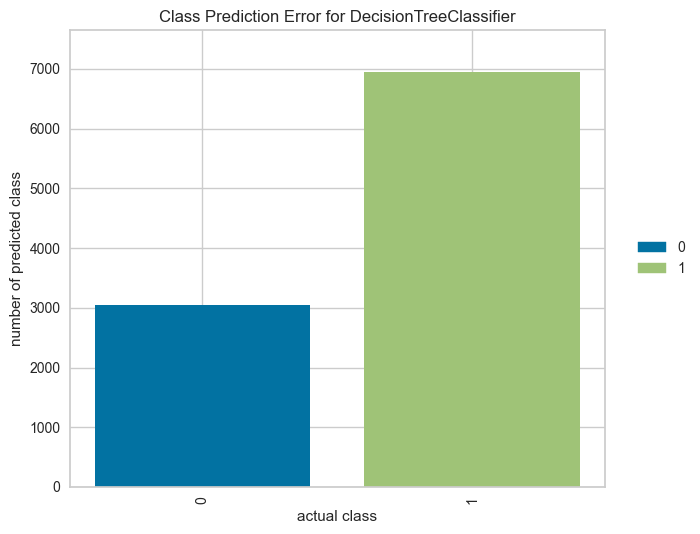

In [54]:
# Crear grafica del error del modelo final
plot_model(final_model, plot='error')

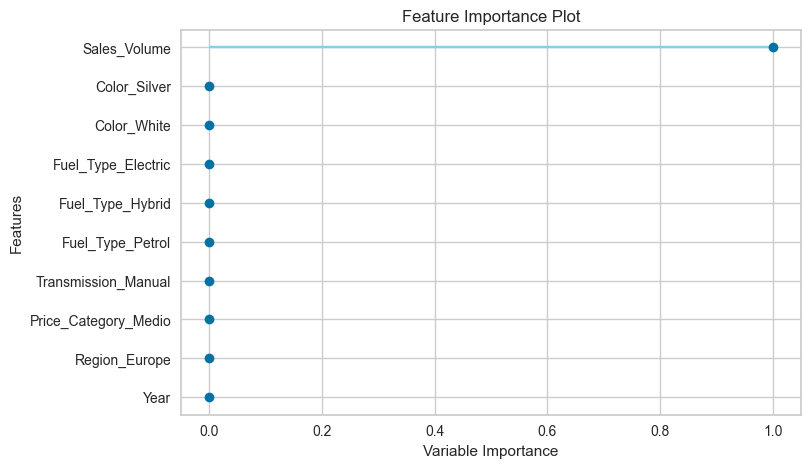

In [55]:
# Importancia de las caracteristicas
plot_model(final_model, plot='feature')

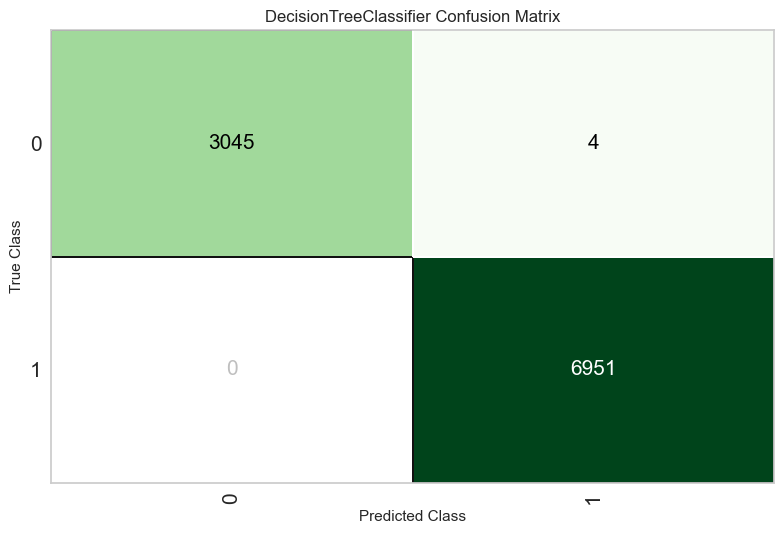

In [56]:
# Graficar matriz de confusión
plot_model(final_model, plot='confusion_matrix')

In [57]:
# Predicciones sobre todo el dataset codificado
predictions = predict_model(final_model, data=df_encoded)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Vehicle_Age,Model_5 Series,Model_7 Series,Model_M3,Model_M5,...,Color_White,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Price_Category_Medio,Mileage_Category_Medio,Sales_Classification,prediction_label,prediction_score
0,2016,3.5,151748,98740,8300,9,True,False,False,False,...,False,False,False,True,True,False,True,High,High,1.0
1,2013,1.6,121671,79219,3428,12,False,False,False,False,...,False,False,True,False,False,False,True,Low,Low,1.0
2,2022,4.5,10991,113265,6994,3,True,False,False,False,...,False,False,False,True,False,False,False,Low,Low,1.0
3,2024,1.7,27255,60971,4047,1,False,False,False,False,...,False,False,False,True,False,True,False,Low,Low,1.0
4,2020,2.1,122131,49898,3080,5,False,True,False,False,...,False,False,False,False,True,True,True,Low,Low,1.0


In [58]:
# Experimento 2 - Quitar las variables relacionadas 

# Verificar nuevas columnas

In [59]:
# Crear columna de acuerdo al kilometeraje (mileage) y la edad del vehiculo y definir 3 categorias: muy usado, usado, casi nuevo
def categorize_usage(row):
    mileage = row['Mileage_KM']
    age = row['Vehicle_Age']
    if mileage > 150000 or age > 10:
        return 'Muy Usado'
    elif 80000 < mileage <= 150000 or 5 < age <= 10:
        return 'Usado'
    else:
        return 'Casi Nuevo'
    
    
db_bmw['Mileage_Age_Category'] = db_bmw.apply(categorize_usage, axis=1)

In [60]:
db_bmw.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Vehicle_Age,Price_Category,Mileage_Category,Mileage_Age_Category
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,9,Alto,Medio,Muy Usado
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,12,Alto,Medio,Muy Usado
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,3,Alto,Bajo,Casi Nuevo
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,1,Medio,Bajo,Casi Nuevo
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,5,Medio,Medio,Usado


In [61]:
# Eliminar columnas correlacionadas o redundantes del dataframe
db_bmw = db_bmw.drop(columns=['Mileage_KM', 'Year', 'Sales_Volume', 'Vehicle_Age','Price_USD'])

In [62]:
db_bmw.head()

,Model,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Sales_Classification,Price_Category,Mileage_Category,Mileage_Age_Category
0,5 Series,Asia,Red,Petrol,Manual,3.5,High,Alto,Medio,Muy Usado
1,i8,North America,Red,Hybrid,Automatic,1.6,Low,Alto,Medio,Muy Usado
2,5 Series,North America,Blue,Petrol,Automatic,4.5,Low,Alto,Bajo,Casi Nuevo
3,X3,Middle East,Blue,Petrol,Automatic,1.7,Low,Medio,Bajo,Casi Nuevo
4,7 Series,South America,Black,Diesel,Manual,2.1,Low,Medio,Medio,Usado


# Selección de columnas para el modelo

In [64]:
# Listado de columnas
db_bmw.columns

Index(['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Sales_Classification', 'Price_Category',
       'Mileage_Category', 'Mileage_Age_Category'],
      dtype='object')

In [65]:
# Variables categoricas (incluyendo la variable objetivo)
cat_cols = [col for col in db_bmw.columns if db_bmw[col].dtype == 'object' and col != 'Sales_Classification']

# Variables numericas
num_cols = [col for col in db_bmw.columns if db_bmw[col].dtype != 'object' and col != 'Sales_Classification']

cat_cols, num_cols

(['Model',
  'Region',
  'Color',
  'Fuel_Type',
  'Transmission',
  'Price_Category',
  'Mileage_Category',
  'Mileage_Age_Category'],
 ['Engine_Size_L'])

# One- Hot encoding y matriz de correlación

### One-Hot Encoding

##### Para usar modelos de machine learning, convertimmos las variables categoricas en variables numericas mediante One-Hot Encoding (variables dummys 0/1).

In [66]:
# Aplicamos One-Hot encoding a las variables categoricas
db_bmw_encoded = pd.get_dummies(db_bmw, columns=cat_cols, drop_first=True)
db_bmw_encoded.head()

,Engine_Size_L,Sales_Classification,Model_5 Series,Model_7 Series,Model_M3,Model_M5,Model_X1,Model_X3,Model_X5,Model_X6,...,Color_Silver,Color_White,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Price_Category_Medio,Mileage_Category_Medio,Mileage_Age_Category_Muy Usado,Mileage_Age_Category_Usado
0,3.5,High,True,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,True,True,False
1,1.6,Low,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False
2,4.5,Low,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1.7,Low,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,False,False
4,2.1,Low,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,True


### Mariz de correlación de variables numericas independientes

#### Revisamos la correlación entre las variables numericas de entrada (sin incluir la variable objetivo).

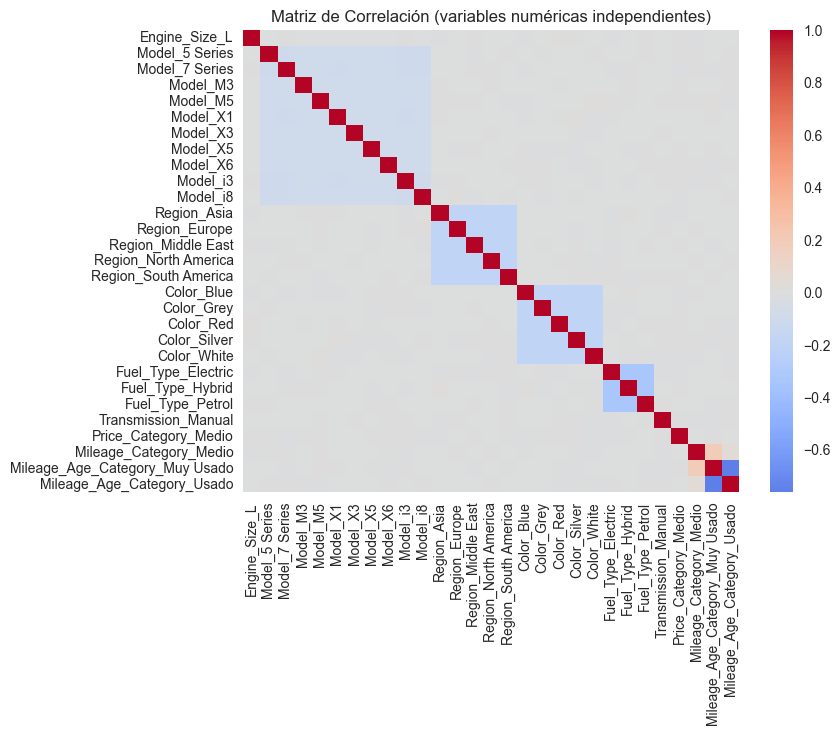

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numericas independientes (solo del dataframe ya modificado)
numeric_independent_cols=[col for col in db_bmw_encoded.columns 
                          if col != 'Sales_Classification' and db_bmw_encoded[col].dtype != 'object']

corr_matrix = db_bmw_encoded[numeric_independent_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación (variables numéricas independientes)')
plt.show()

## Modelado con PyCaret sin SMOTE

In [68]:
from pycaret.classification import *

# Experimento 2: Sin SMOTE y con nuevas columnas
exp1_no_smote = setup(
    data=db_bmw_encoded,
    target='Sales_Classification',
    session_id=42,
    train_size=0.8,
    fold=5,
    normalize=True,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.95,
    fix_imbalance=False,        # sin SMOTE
    verbose=True
)

,Description,Value
0,Session id,42
1,Target,Sales_Classification
2,Target type,Binary
3,Target mapping,"High: 0, Low: 1"
4,Original data shape,"(50000, 30)"
5,Transformed data shape,"(50000, 30)"
6,Transformed train set shape,"(40000, 30)"
7,Transformed test set shape,"(10000, 30)"
8,Numeric features,1
9,Preprocess,True


### Selección del mejor modelo (sin SMOTE)

In [69]:
# Cpmparamos solo LR, Random Forest y CatBoost
best_not_smote = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6951,0.4944,0.6951,0.4831,0.5700,0.0000,0.0000,1.1700
nb,Naive Bayes,0.6951,0.4925,0.6951,0.4831,0.5700,0.0000,0.0000,0.7040
svm,SVM - Linear Kernel,0.6951,0.5014,0.6951,0.4831,0.5700,0.0000,0.0000,0.2400
ridge,Ridge Classifier,0.6951,0.4944,0.6951,0.4831,0.5700,0.0000,0.0000,0.1480
ada,Ada Boost Classifier,0.6951,0.4937,0.6951,0.4831,0.5700,0.0000,0.0000,0.3800
lda,Linear Discriminant Analysis,0.6951,0.4944,0.6951,0.4831,0.5700,0.0000,0.0000,0.1600
dummy,Dummy Classifier,0.6951,0.5000,0.6951,0.4831,0.5700,0.0000,0.0000,0.1360
gbc,Gradient Boosting Classifier,0.6950,0.4923,0.6950,0.4831,0.5700,-0.0000,-0.0015,0.8660
lightgbm,Light Gradient Boosting Machine,0.6946,0.4911,0.6946,0.5635,0.5705,-0.0000,-0.0014,0.3340
qda,Quadratic Discriminant Analysis,0.6941,0.4892,0.6941,0.5503,0.5705,-0.0006,-0.0061,0.2360


### Gráficas y métricas del mejor modelo (sin SMOTE)

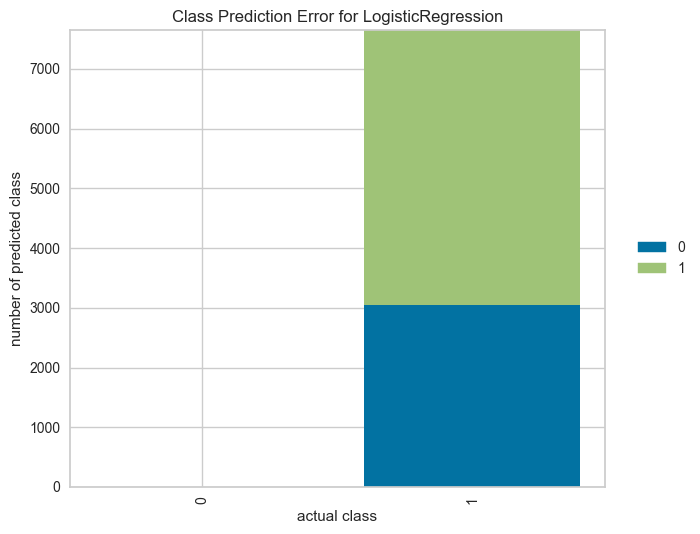

In [70]:
# Gráfica de error
plot_model(best_not_smote, plot='error')

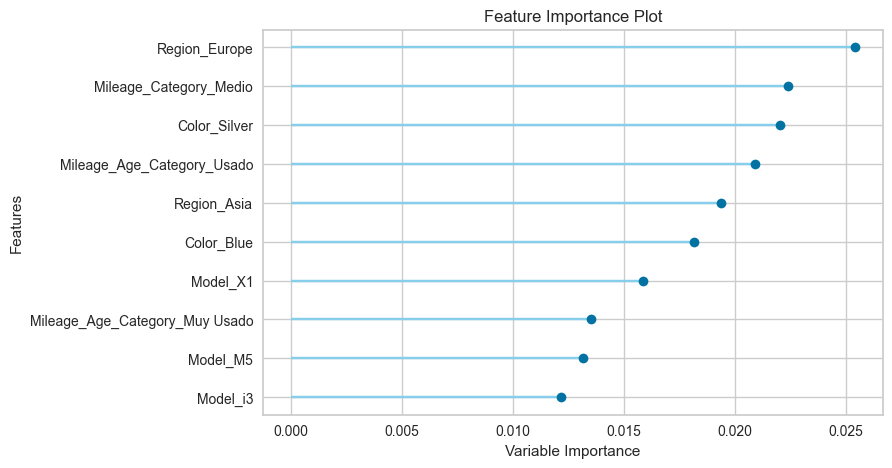

In [71]:
# Importancia de las características
plot_model(best_not_smote, plot='feature')

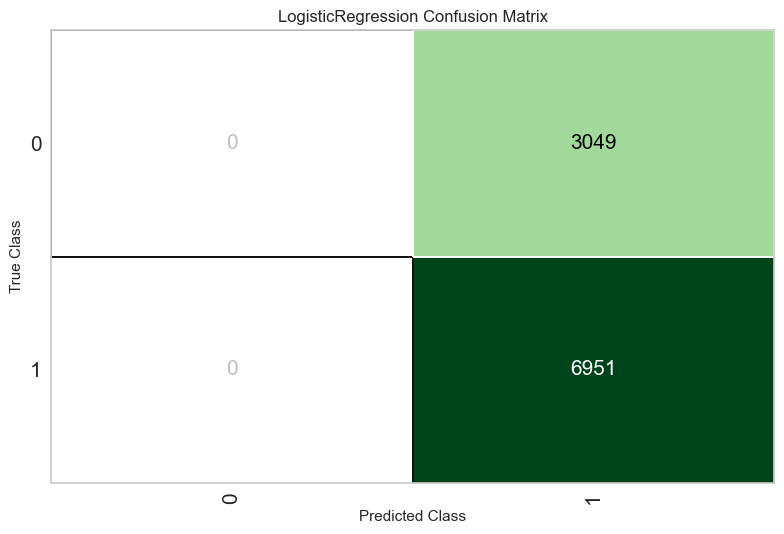

In [72]:
# Matriz de confusión
plot_model(best_not_smote, plot='confusion_matrix')

### Modelo final y predicciones (sin SMOTE)

In [73]:
# Entrenamos el modelo final con PyCaret
final_not_smote = finalize_model(best_not_smote)

In [74]:
# Preddicones sobre todo el dataset codificado
predictions_not_smote = predict_model(final_not_smote, data=db_bmw_encoded)
predictions_not_smote.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6951,0.5124,0.6951,0.4831,0.5700,0.0000,0.0000


,Engine_Size_L,Model_5 Series,Model_7 Series,Model_M3,Model_M5,Model_X1,Model_X3,Model_X5,Model_X6,Model_i3,...,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Price_Category_Medio,Mileage_Category_Medio,Mileage_Age_Category_Muy Usado,Mileage_Age_Category_Usado,Sales_Classification,prediction_label,prediction_score
0,3.5,True,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,False,High,Low,0.6983
1,1.6,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,True,False,Low,Low,0.6942
2,4.5,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,Low,Low,0.6963
3,1.7,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,Low,Low,0.6963
4,2.1,False,True,False,False,False,False,False,False,False,...,False,False,True,True,True,False,True,Low,Low,0.6934


In [75]:
# Extraemos columnas de predicciones Y score y las renombramos
preds_cols_not = predictions_not_smote[['prediction_label', 'prediction_score']].rename(
    columns={'prediction_label': 'Label_not_smote', 'prediction_score': 'Score_not_smote'})

# Unimos con el dataframe original (sin ecoding), alineando por indice
db_final_not_smote = pd.concat([db_bmw.reset_index(drop=True), preds_cols_not.reset_index(drop=True)], axis=1)
db_final_not_smote.head()


,Model,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Sales_Classification,Price_Category,Mileage_Category,Mileage_Age_Category,Label_not_smote,Score_not_smote
0,5 Series,Asia,Red,Petrol,Manual,3.5,High,Alto,Medio,Muy Usado,Low,0.6983
1,i8,North America,Red,Hybrid,Automatic,1.6,Low,Alto,Medio,Muy Usado,Low,0.6942
2,5 Series,North America,Blue,Petrol,Automatic,4.5,Low,Alto,Bajo,Casi Nuevo,Low,0.6963
3,X3,Middle East,Blue,Petrol,Automatic,1.7,Low,Medio,Bajo,Casi Nuevo,Low,0.6963
4,7 Series,South America,Black,Diesel,Manual,2.1,Low,Medio,Medio,Usado,Low,0.6934


### Gráficas y métricas del mejor modelo (con SMOTE)

In [76]:
# Para arreglar el desbalance

from imblearn.over_sampling import SMOTE

smote= SMOTE(random_state=42)

#Experimento 3 - Con SMOTE
exp_smote = setup(
    data=db_bmw_encoded,
    target='Sales_Classification',
    session_id=42,
    train_size=0.8,
    fold=5,
    normalize=True,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.95,
    fix_imbalance=True, 
    fix_imbalance_method=smote,       # con SMOTE
    verbose=True
)

  File "c:\Users\rrosm\Documents\GitHub\modelobmw\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\rrosm\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 546, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rrosm\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1022, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\rrosm\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1491, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


,Description,Value
0,Session id,42
1,Target,Sales_Classification
2,Target type,Binary
3,Target mapping,"High: 0, Low: 1"
4,Original data shape,"(50000, 30)"
5,Transformed data shape,"(65606, 30)"
6,Transformed train set shape,"(55606, 30)"
7,Transformed test set shape,"(10000, 30)"
8,Numeric features,1
9,Preprocess,True


### Selección del mejor modelo (con SMOTE)

In [77]:
#Comparamos de nuevo LR, Random Forest y CatBoost
best_smote = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6886,0.4968,0.6886,0.5706,0.5745,-0.0019,-0.0050,1.2640
rf,Random Forest Classifier,0.5957,0.4950,0.5957,0.5733,0.5828,-0.0064,-0.0065,2.8780
et,Extra Trees Classifier,0.5881,0.4953,0.5881,0.5736,0.5802,-0.0059,-0.0059,2.9540
gbc,Gradient Boosting Classifier,0.5693,0.5012,0.5693,0.5756,0.5722,-0.0011,-0.0011,3.0500
dt,Decision Tree Classifier,0.5642,0.5009,0.5642,0.5771,0.5701,0.0024,0.0024,0.9800
knn,K Neighbors Classifier,0.5331,0.4936,0.5331,0.5705,0.5475,-0.0126,-0.0129,5.1440
ada,Ada Boost Classifier,0.5191,0.5034,0.5191,0.5788,0.5376,0.0057,0.0060,1.4180
qda,Quadratic Discriminant Analysis,0.5171,0.4980,0.5171,0.5755,0.5355,-0.0014,-0.0014,0.8160
svm,SVM - Linear Kernel,0.5132,0.5008,0.5131,0.5756,0.5319,-0.0010,-0.0011,1.0300
lr,Logistic Regression,0.5094,0.5009,0.5094,0.5768,0.5287,0.0013,0.0015,2.2580


### Gráficas del mejor modelo (con SMOTE)

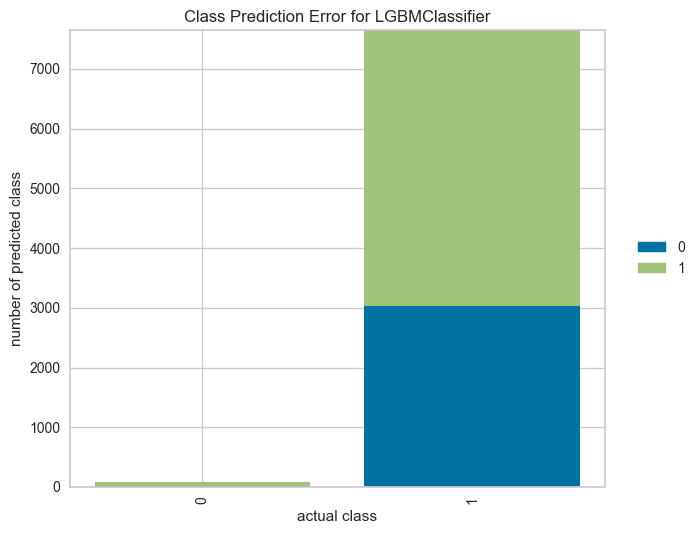

In [78]:
# Grafica de error
plot_model(best_smote, plot='error')

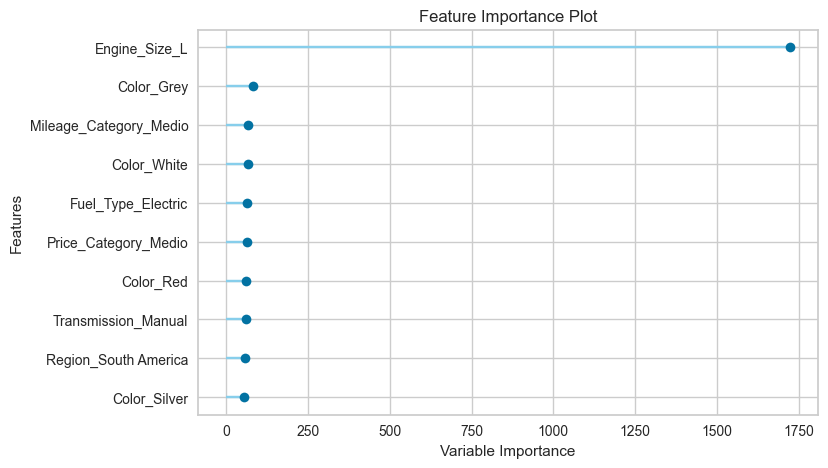

In [79]:
# Importancia de las características
plot_model(best_smote, plot='feature')

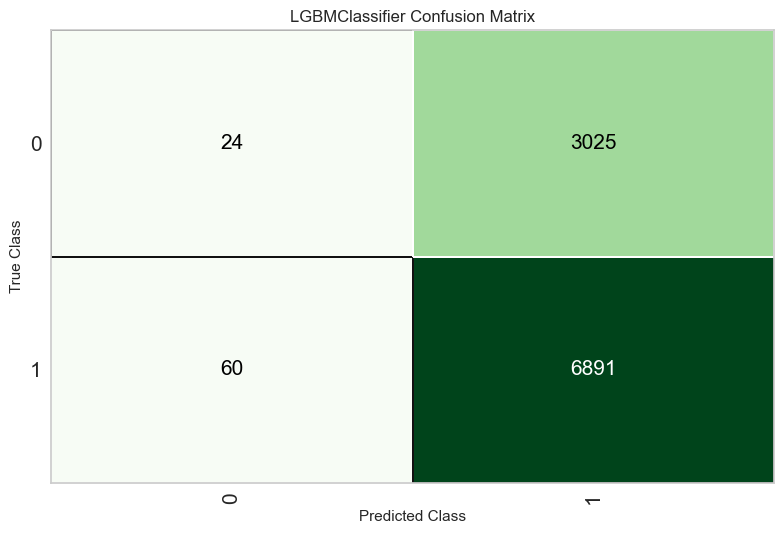

In [80]:
# Matriz de confusión
plot_model(best_smote, plot='confusion_matrix')

#### Modelo final y predicciones (con SMOTE)

In [81]:
# Entrenamos el modelo final con SMOTE
final_smote = finalize_model(best_smote)

In [82]:
# Predicciones sobre todo el dataset codificado
predictions_smote = predict_model(final_smote, data=db_bmw_encoded)
predictions_smote.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.6963,0.5943,0.6963,0.6903,0.5748,0.0081,0.0467


,Engine_Size_L,Model_5 Series,Model_7 Series,Model_M3,Model_M5,Model_X1,Model_X3,Model_X5,Model_X6,Model_i3,...,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Price_Category_Medio,Mileage_Category_Medio,Mileage_Age_Category_Muy Usado,Mileage_Age_Category_Usado,Sales_Classification,prediction_label,prediction_score
0,3.5,True,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,False,High,Low,0.5786
1,1.6,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,True,False,Low,Low,0.6312
2,4.5,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,Low,Low,0.6971
3,1.7,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,Low,Low,0.6623
4,2.1,False,True,False,False,False,False,False,False,False,...,False,False,True,True,True,False,True,Low,Low,0.6143


In [83]:
# Extraemos columnas de predicciones Y score y las renombramos
pred_cols_smote = predictions_smote[['prediction_label', 'prediction_score']].rename(
    columns={'prediction_label': 'Label_smote', 'prediction_score': 'Score_smote'})

# Unimos con el dataframe que ya tenia las columnas sin SMOTE
db_final_smote = pd.concat([db_final_not_smote.reset_index(drop=True), pred_cols_smote.reset_index(drop=True)], axis=1)
db_final_smote.head()

,Model,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Sales_Classification,Price_Category,Mileage_Category,Mileage_Age_Category,Label_not_smote,Score_not_smote,Label_smote,Score_smote
0,5 Series,Asia,Red,Petrol,Manual,3.5,High,Alto,Medio,Muy Usado,Low,0.6983,Low,0.5786
1,i8,North America,Red,Hybrid,Automatic,1.6,Low,Alto,Medio,Muy Usado,Low,0.6942,Low,0.6312
2,5 Series,North America,Blue,Petrol,Automatic,4.5,Low,Alto,Bajo,Casi Nuevo,Low,0.6963,Low,0.6971
3,X3,Middle East,Blue,Petrol,Automatic,1.7,Low,Medio,Bajo,Casi Nuevo,Low,0.6963,Low,0.6623
4,7 Series,South America,Black,Diesel,Manual,2.1,Low,Medio,Medio,Usado,Low,0.6934,Low,0.6143
